<a href="https://colab.research.google.com/github/Er-luffy-D/Brain-Tumor/blob/dev/Tumour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [ ]:
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Before Running this make sure you got the data on your files Brain_Tumor_Data_Set.zip

from pathlib import Path
import zipfile
import os
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

data_path = Path("data/")

image_path=data_path/"Brain Tumor Data Set"
if image_path.is_dir():
  print(f"{image_path} already exists... skipping downloading ")
else:
  os.makedirs(image_path)
  print(f"{image_path} doesn't exists... extracting.... ")
  with zipfile.ZipFile("/content/Brain_Tumor_Data_Set.zip","r") as zip_ref:
    print(f"Unzipping the zip in {image_path}")
    zip_ref.extractall(image_path)


data/Brain Tumor Data Set doesn't exists... extracting.... 
Unzipping the zip in data/Brain Tumor Data Set


In [ ]:
image_path=Path("data/Brain Tumor Data Set/Brain Tumor Data Set")
train_dir=image_path/"Train"
test_dir=image_path/"Test"

In [ ]:
import os
def walk_through(dir_path):
  """Walks through dir_path returns its contents"""
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [ ]:
walk_through(image_path)

There are 2 directories and 0 images in data/Brain Tumor Data Set/Brain Tumor Data Set
There are 2 directories and 0 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Test
There are 0 directories and 418 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Healthy
There are 0 directories and 493 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Tumour
There are 2 directories and 0 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Train
There are 0 directories and 1668 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Train/Healthy
There are 0 directories and 1933 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Train/Tumour


### Visualizing images

In [ ]:
image_path

PosixPath('data/Brain Tumor Data Set/Brain Tumor Data Set')

data/Brain Tumor Data Set/Brain Tumor Data Set/Train/Healthy/Not Cancer  (513).jpg
Healthy
Image path:data/Brain Tumor Data Set/Brain Tumor Data Set/Train/Healthy/Not Cancer  (513).jpg
Image size  heigth:236 | width:214


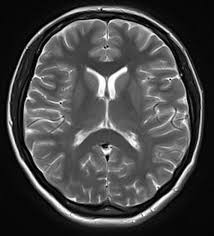

In [ ]:
from PIL import Image
import random

random.seed(42)

image_path_list=list(image_path.glob("*/*/*.jpg"))

random_image_path=random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img=Image.open(random_image_path)

print(f"Image path:{random_image_path}")
print(f"Image size  heigth:{img.height} | width:{img.width}")
img

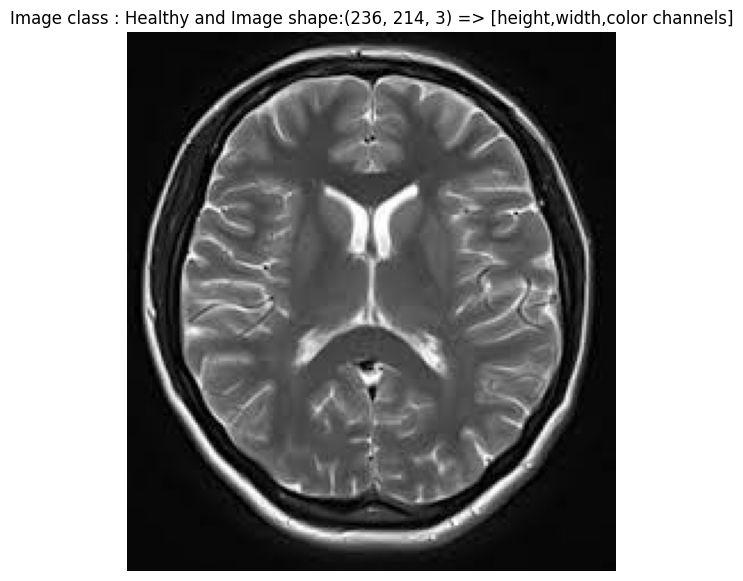

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array=np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class : {image_class} and Image shape:{img_as_array.shape} => [height,width,color channels]")
plt.axis(False);

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transform for the data
                                  target_transform=None) # transform for the label/target

test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 3601
     Root location: data/Brain Tumor Data Set/Brain Tumor Data Set/Train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 911
     Root location: data/Brain Tumor Data Set/Brain Tumor Data Set/Test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get class names as list
class_names=train_data.classes
class_names

['Healthy', 'Tumour']

In [ ]:
# CHeck the lenght of our datasets
len(train_data),len(test_data)

(3601, 911)

In [ ]:
train_data.samples[0]

('data/Brain Tumor Data Set/Brain Tumor Data Set/Train/Healthy/Not Cancer  (1).jpeg',
 0)

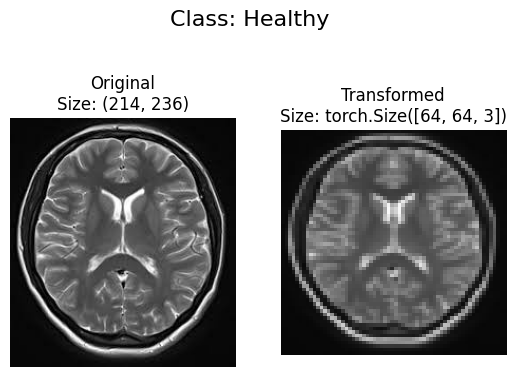

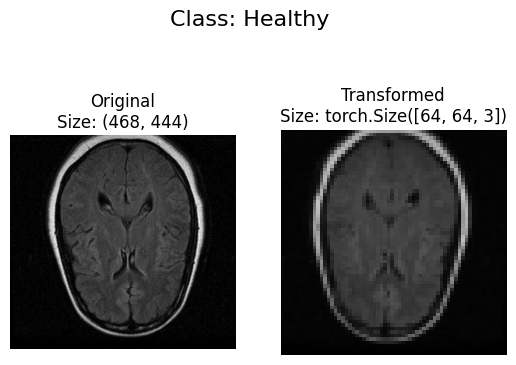

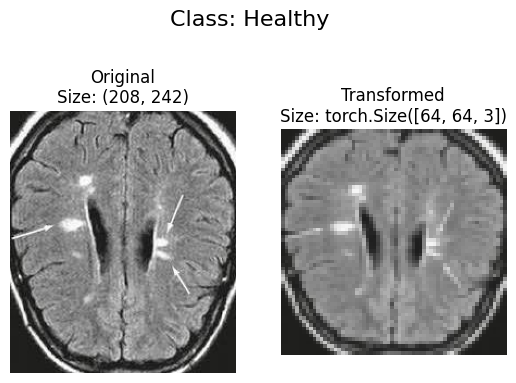

In [ ]:
def plot_transformed_images(image_paths:list,transform,n=3,seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version...
  """
  if seed:
    random.seed(seed)
  random_image_paths=random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis("off")

      # Transform and plot target image
      transformed_image=transform(f).permute(1,2,0)   # we have to convert (3,64,64) to (64,64,3) cause matplot takes color channel last
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis("off")


      plt.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)
plot_transformed_images(image_path_list,data_transform,n=3,seed=42)

In [ ]:
img,label=train_data[0][0],train_data[0][1]
print(f"Img:  {img}")
print(f"Img shape:  {img.shape}")
print(f"Img datatype:  {img.dtype}")
print(f"Img label:  {label}")
print(f"label datatype:  {type(label)}")

Img:  tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Img shape:  torch.Size([3, 64, 64])
Img datatype:  torch.float32
Img label:  0
label datatype:  <class 'int'>


Original shape: torch.Size([3, 64, 64])->[color_channels,height,width]
Original shape: torch.Size([64, 64, 3])->[height,width,color_channels]


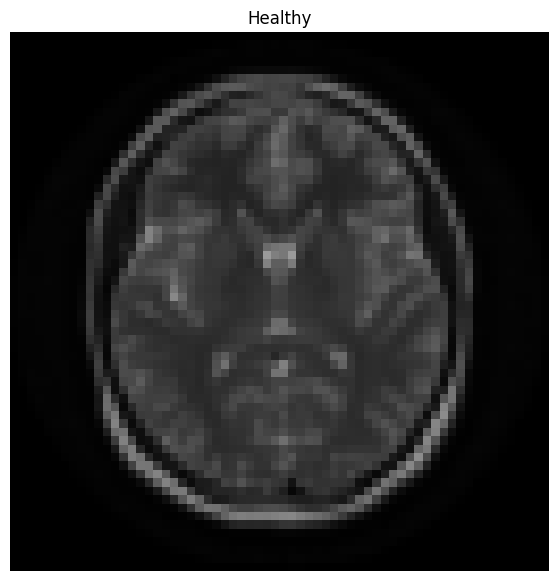

In [ ]:
# Rearrange the order dimensions
img_permute = img.permute(1,2,0)

# Print out different shapes
print(f"Original shape: {img.shape}->[color_channels,height,width]")
print(f"Original shape: {img_permute.shape}->[height,width,color_channels]")

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label]);

### Turning loaded image into Dataloader

In [ ]:
from torch.utils.data import DataLoader
import os

NUM_WORKER=os.cpu_count()
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKER,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKER,
                            shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x780b91ceda80>,
 <torch.utils.data.dataloader.DataLoader at 0x780b91ceda20>)

In [ ]:
len(train_dataloader),len(test_dataloader)

(113, 29)

In [ ]:
img, label = next(iter(train_dataloader))

#Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels,height,width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels,height,width]
Label shape: torch.Size([32])


In [ ]:
import torch.nn.functional as F
class BrainTumorCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)  # Output: (32, 64, 64)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Output: (64, 64, 64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Output: (128, 64, 64)

        # Define pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces size to half
        self.relu=nn.ReLU()
        # Define fully connected layers
        self.fc1 = nn.Linear(8192, 128)  # Adjust based on the output size after convolutions and pooling
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)  # Output for healthy and tumor classes

    def forward(self, x):
        # Forward pass through the convolutional layers with ReLU activation and pooling
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))

        # Flatten the tensor using torch.flatten
        x = torch.flatten(x, start_dim=1)  # Flatten all dimensions except batch dimension

        # Forward pass through fully connected layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # Logits for the two classes

        return x

# Initialize model
model = BrainTumorCNN()

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model=model.to(device)

In [ ]:
from tqdm import tqdm
def train_epoch(model, train_loader, optimizer, device):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0

    with tqdm(train_loader, desc="Training", unit="batch") as tepoch:
        for images, labels in tepoch:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update metrics
            running_loss += loss.item()
            predicted_classes = torch.argmax(outputs, dim=1)
            correct_predictions += (predicted_classes == labels).sum().item()

            # Update progress bar with loss and accuracy
            tepoch.set_postfix(loss=loss.item(), accuracy=correct_predictions / len(labels))

    average_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / len(train_loader.dataset)
    return average_loss, accuracy

def test_epoch(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():  # Disable gradient calculation for testing
        with tqdm(test_loader, desc="Testing", unit="batch") as tepoch:
            for images, labels in tepoch:
                images, labels = images.to(device), labels.to(device)

                # Forward pass
                outputs = model(images)
                loss = loss_fn(outputs, labels)

                # Update metrics
                running_loss += loss.item()
                predicted_classes = torch.argmax(outputs, dim=1)
                correct_predictions += (predicted_classes == labels).sum().item()

                # Update progress bar with loss and accuracy
                tepoch.set_postfix(loss=loss.item(), accuracy=correct_predictions / len(labels))

    average_loss = running_loss / len(test_loader)
    accuracy = correct_predictions / len(test_loader.dataset)
    return average_loss, accuracy

# Main training loop
epochs = 15
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, device)
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    test_loss, test_accuracy = test_epoch(model, test_dataloader, device)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/15


Training: 100%|██████████| 113/113 [00:09<00:00, 12.04batch/s, accuracy=138, loss=0.561]


Train Loss: 0.6082, Train Accuracy: 0.6512


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.25batch/s, accuracy=36.5, loss=0.997]


Test Loss: 0.6855, Test Accuracy: 0.6004
Epoch 2/15


Training: 100%|██████████| 113/113 [00:08<00:00, 13.04batch/s, accuracy=176, loss=0.365]


Train Loss: 0.3872, Train Accuracy: 0.8287


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.87batch/s, accuracy=48.9, loss=0.492]


Test Loss: 0.4547, Test Accuracy: 0.8057
Epoch 3/15


Training: 100%|██████████| 113/113 [00:08<00:00, 13.08batch/s, accuracy=184, loss=0.216]


Train Loss: 0.2931, Train Accuracy: 0.8709


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.64batch/s, accuracy=50, loss=0.446]


Test Loss: 0.4187, Test Accuracy: 0.8233
Epoch 4/15


Training: 100%|██████████| 113/113 [00:07<00:00, 14.70batch/s, accuracy=196, loss=0.436]


Train Loss: 0.1992, Train Accuracy: 0.9236


Testing: 100%|██████████| 29/29 [00:02<00:00, 10.84batch/s, accuracy=53.5, loss=0.28]


Test Loss: 0.3109, Test Accuracy: 0.8814
Epoch 5/15


Training: 100%|██████████| 113/113 [00:07<00:00, 15.02batch/s, accuracy=199, loss=0.0356]


Train Loss: 0.1619, Train Accuracy: 0.9408


Testing: 100%|██████████| 29/29 [00:01<00:00, 17.21batch/s, accuracy=56.3, loss=0.132]


Test Loss: 0.2282, Test Accuracy: 0.9265
Epoch 6/15


Training: 100%|██████████| 113/113 [00:08<00:00, 13.03batch/s, accuracy=205, loss=0.059]


Train Loss: 0.0995, Train Accuracy: 0.9678


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.87batch/s, accuracy=56.7, loss=0.0975]


Test Loss: 0.1935, Test Accuracy: 0.9341
Epoch 7/15


Training: 100%|██████████| 113/113 [00:08<00:00, 12.94batch/s, accuracy=206, loss=0.0146]


Train Loss: 0.0775, Train Accuracy: 0.9720


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.76batch/s, accuracy=57.9, loss=0.056]


Test Loss: 0.1444, Test Accuracy: 0.9539
Epoch 8/15


Training: 100%|██████████| 113/113 [00:07<00:00, 14.51batch/s, accuracy=208, loss=0.0253]


Train Loss: 0.0490, Train Accuracy: 0.9836


Testing: 100%|██████████| 29/29 [00:02<00:00, 10.72batch/s, accuracy=57.7, loss=0.0179]


Test Loss: 0.1622, Test Accuracy: 0.9506
Epoch 9/15


Training: 100%|██████████| 113/113 [00:07<00:00, 15.27batch/s, accuracy=209, loss=0.00212]


Train Loss: 0.0386, Train Accuracy: 0.9875


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.58batch/s, accuracy=59.1, loss=0.0393]


Test Loss: 0.1425, Test Accuracy: 0.9726
Epoch 10/15


Training: 100%|██████████| 113/113 [00:08<00:00, 13.01batch/s, accuracy=209, loss=0.00584]


Train Loss: 0.0384, Train Accuracy: 0.9878


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.69batch/s, accuracy=58.3, loss=0.111]


Test Loss: 0.1437, Test Accuracy: 0.9594
Epoch 11/15


Training: 100%|██████████| 113/113 [00:08<00:00, 13.00batch/s, accuracy=208, loss=0.00198]


Train Loss: 0.0491, Train Accuracy: 0.9836


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.67batch/s, accuracy=59.5, loss=0.0189]


Test Loss: 0.0907, Test Accuracy: 0.9802
Epoch 12/15


Training: 100%|██████████| 113/113 [00:07<00:00, 14.45batch/s, accuracy=210, loss=0.0661]


Train Loss: 0.0326, Train Accuracy: 0.9894


Testing: 100%|██████████| 29/29 [00:02<00:00, 11.45batch/s, accuracy=59.1, loss=0.00835]


Test Loss: 0.1176, Test Accuracy: 0.9737
Epoch 13/15


Training: 100%|██████████| 113/113 [00:07<00:00, 15.16batch/s, accuracy=211, loss=0.0906]


Train Loss: 0.0147, Train Accuracy: 0.9942


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.71batch/s, accuracy=58.8, loss=0.00754]


Test Loss: 0.1358, Test Accuracy: 0.9682
Epoch 14/15


Training: 100%|██████████| 113/113 [00:08<00:00, 13.10batch/s, accuracy=210, loss=0.00253]


Train Loss: 0.0229, Train Accuracy: 0.9914


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.67batch/s, accuracy=59.1, loss=0.00329]


Test Loss: 0.0940, Test Accuracy: 0.9737
Epoch 15/15


Training: 100%|██████████| 113/113 [00:08<00:00, 13.08batch/s, accuracy=210, loss=0.00403]


Train Loss: 0.0192, Train Accuracy: 0.9925


Testing: 100%|██████████| 29/29 [00:01<00:00, 16.68batch/s, accuracy=59.5, loss=0.011]

Test Loss: 0.0779, Test Accuracy: 0.9802


In [ ]:
# img=torchvision.io.read_image("/content/Cancer (1).jpg")
# img=img.type(torch.float32)
# img=img/255.0
# img.shape

In [ ]:
# plt.imshow(img.permute(1,2,0))

In [ ]:
transform_simple=transforms.Compose([
    transforms.Resize(size=(64,64))
    ,transforms.ToTensor()
])

In [ ]:
# model.eval()
# with torch.inference_mode():
#   img=transform_simple(img)
#   img=img.unsqueeze(dim=0)
#   img=img.to(device)
#   pred=model(img)
# pred

In [ ]:
# class_names[torch.argmax(pred)]

In [ ]:
# import torch

# # Assuming 'model' is your trained model
# model_dict = model.state_dict()

# # Save the model dictionary to a file
# torch.save(model_dict, 'brain_tumor_model.pth')

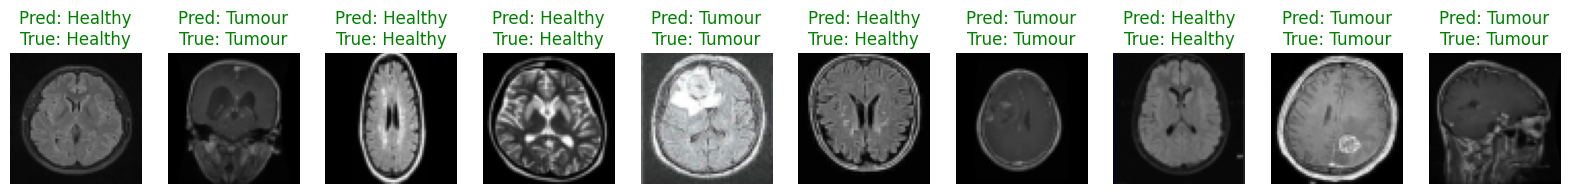

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

model.to(device)
model.eval()


# Function to plot images with correct/incorrect labels
def plot_test_images(model, test_loader, class_names, n=10):
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        predictions = model(images[:n])
    predicted_labels = torch.argmax(predictions, dim=1)

    fig, axes = plt.subplots(1, n, figsize=(20, 5))
    for i in range(n):
      axes[i].imshow(images[i].cpu().permute(1,2,0))
      axes[i].axis('off')
      title_color = 'green' if predicted_labels[i] == labels[i] else 'red'
      axes[i].set_title(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[labels[i]]}", color=title_color)
    plt.show()


plot_test_images(model, train_dataloader, class_names)

In [ ]:
model

BrainTumorCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=8192, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
# Import/install Gradio
try:
    import gradio as gr
except:
    !pip -q install gradio
    import gradio as gr

print(f"Gradio version: {gr.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.8 MB/s eta 0:00:00
Gradio version: 5.5.0


In [ ]:
# from pathlib import Path

# model_path=Path('data/')
torch.save(model.state_dict(),'model_0.pth')

In [ ]:
# Put EffNetB2 on CPU
model.to("cpu")

# Check the device
next(iter(model.parameters())).device

device(type='cpu')

In [ ]:
from typing import Tuple, Dict
from timeit import default_timer as timer
def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = transform_simple(img).unsqueeze(dim=0)

    # Put model into evaluation mode and turn on inference mode
    model.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(model(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

In [ ]:
test_dir

PosixPath('data/Brain Tumor Data Set/Brain Tumor Data Set/Test')

In [ ]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Healthy/Not Cancer  (1808).jpg

Prediction label and probability dictionary: 
{'Healthy': 0.9993376135826111, 'Tumour': 0.0006623349618166685}
Prediction time: 0.00654 seconds


In [ ]:
# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Tumour/Cancer (2097).jpg'],
 ['data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Tumour/Cancer (2165).jpg'],
 ['data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Healthy/Not Cancer  (1905).jpg']]

In [ ]:
import gradio as gr

# Create title, description and article strings
title = "Brain tumour"
description = "classigy mri scans ."
article = "Created using Cnn."

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b96f91bd6836879243.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import shutil
from pathlib import Path

# Create FoodVision mini demo path
brain_tumour_demo_path = Path("demos/brain_tumour/")

# Remove files that might already exist there and create new directory
if brain_tumour_demo_path.exists():
    shutil.rmtree(brain_tumour_demo_path)
# If the file doesn't exist, create it anyway
brain_tumour_demo_path.mkdir(parents=True,
                                exist_ok=True)

# Check what's in the folder
!ls demos/brain_tumour/

In [ ]:
import shutil
from pathlib import Path

# 1. Create an examples directory
brain_tumour_examples_path = brain_tumour_demo_path / "examples"
brain_tumour_examples_path.mkdir(parents=True, exist_ok=True)

# 2. Collect three random test dataset image paths
brain_tumour_examples = [Path('data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Healthy/Not Cancer  (1667).jpg'),
                            Path('data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Healthy/Not Cancer  (1669).jpg'),
                            Path('data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Tumour/Cancer (1939).jpg'),
                            Path('data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Tumour/Cancer (1949).jpg')
                            ]

# 3. Copy the three random images to the examples directory
for example in brain_tumour_examples:
    destination = brain_tumour_examples_path / example.name
    print(f"[INFO] Copying {example} to {destination}")
    shutil.copy2(src=example, dst=destination)

[INFO] Copying data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Healthy/Not Cancer  (1667).jpg to demos/brain_tumour/examples/Not Cancer  (1667).jpg
[INFO] Copying data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Healthy/Not Cancer  (1669).jpg to demos/brain_tumour/examples/Not Cancer  (1669).jpg
[INFO] Copying data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Tumour/Cancer (1939).jpg to demos/brain_tumour/examples/Cancer (1939).jpg
[INFO] Copying data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Tumour/Cancer (1949).jpg to demos/brain_tumour/examples/Cancer (1949).jpg


In [ ]:
import os

# Get example filepaths in a list of lists
example_list = [["examples/" + example] for example in os.listdir(brain_tumour_examples_path)]
example_list

[['examples/Cancer (1949).jpg'],
 ['examples/Not Cancer  (1667).jpg'],
 ['examples/Not Cancer  (1669).jpg'],
 ['examples/Cancer (1939).jpg']]

In [ ]:
import shutil

# Create a source path for our target model
brain_tumor_model_path = "model_0.pth"

# Create a destination path for our target model
brain_tumor_model_destination = brain_tumour_demo_path / brain_tumor_model_path.split("/")[0]

# Try to move the file
try:
    print(f"[INFO] Attempting to move {brain_tumor_model_path} to {brain_tumor_model_destination}")

    # Move the model
    shutil.move(src=brain_tumor_model_path,
                dst=brain_tumor_model_destination)

    print(f"[INFO] Model move complete.")

# If the model has already been moved, check if it exists
except:
    print(f"[INFO] No model found at {brain_tumor_model_path}, perhaps its already been moved?")
    print(f"[INFO] Model exists at {brain_tumor_model_destination}: {brain_tumor_model_destination.exists()}")

[INFO] Attempting to move model_0.pth to demos/brain_tumour/model_0.pth
[INFO] Model move complete.


In [ ]:
%%writefile demos/brain_tumour/model.py
import torch
import torch.nn as nn
import torchvision.transforms as transforms

# Define the CNN model
class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        # Fully connected layers
        self.fc1 = nn.Linear(8192, 128)  # Adjust input size if needed
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)  # Output layer matches the number of classes

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def load_model(num_classes=2):
    """
    Initialize and load the model with specified number of classes.

    Args:
    - num_classes (int): The number of output classes.
    - weights_path (str): Path to the model weights.

    Returns:
    - model (nn.Module): The initialized and loaded model.
    - transform (torchvision.transforms.Compose): Transformations for preprocessing input images.
    """
    # Initialize model
    model = BrainTumorCNN(num_classes=num_classes)

      # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Define image transformation pipeline
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor()
    ])

    return model, transform


Overwriting demos/brain_tumour/model.py


In [ ]:
%%writefile demos/brain_tumour/app.py
### 1. Imports and class names setup ###
import gradio as gr
import os
import torch

from model import load_model
from timeit import default_timer as timer
from typing import Tuple, Dict

# Setup class names
class_names = ['Healthy','Tumour']

### 2. Model and transforms preparation ###

# Create brain_tumour model
brain_tumour, brain_tumour_transforms = load_model(
    num_classes=2, # len(class_names) would also work
)

# Load saved weights
brain_tumour.load_state_dict(
    torch.load(
        f="model_0.pth",
        map_location=torch.device("cpu"),  # load to CPU
    )
)

### 3. Predict function ###

# Create predict function
def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = brain_tumour_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    brain_tumour.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(brain_tumour(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

### 4. Gradio app ###

# Create title, description and article strings
title = "Brain Tumor Detection"
description = "Upload an MRI image to detect if it is healthy or has a tumor."

# Create examples list from "examples/" directory
example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    # Create examples list from "examples/" directory
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch()

Writing demos/brain_tumour/app.py


In [ ]:
!pip list > requirements.txt

In [ ]:
%%writefile demos/brain_tumour/requirements.txt
torch==2.5.0
torchvision==0.20.0
gradio==5.5.0

Writing demos/brain_tumour/requirements.txt


In [ ]:
!ls demos/brain_tumour

app.py	examples  model_0.pth  model.py  requirements.txt


In [ ]:
# Change into and then zip the brain_tumour folder but exclude certain files
!cd demos/brain_tumour && zip -r ../brain_tumour.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

# Download the zipped FoodVision Mini app (if running in Google Colab)
try:
    from google.colab import files
    files.download("demos/brain_tumour.zip")
except:
    print("Not running in Google Colab, can't use google.colab.files.download(), please manually download.")

  adding: app.py (deflated 59%)
  adding: examples/ (stored 0%)
  adding: examples/Cancer (1949).jpg (deflated 2%)
  adding: examples/Not Cancer  (1667).jpg (deflated 4%)
  adding: examples/Not Cancer  (1669).jpg (deflated 1%)
  adding: examples/Cancer (1939).jpg (deflated 1%)
  adding: model_0.pth (deflated 7%)
  adding: model.py (deflated 62%)
  adding: requirements.txt (deflated 11%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>